In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import gseapy as gp
from gseapy.plot import gseaplot
from matplotlib.ticker import MultipleLocator

import pickle
import os 

In [92]:
os.chdir('/Users/soheepark/03-GEO근감소/Data/')

# GSE167186

In [14]:
osyh = pd.read_csv('results_GSE167186_osyh_filtered.csv', index_col=0)
with open('results_GSE167186_osyh_filtered_dds.pkl', 'rb') as f:
    osyh_dds = pickle.load(f)

osoh = pd.read_csv('results_GSE167186_osoh_filtered.csv', index_col=0)
with open('results_GSE167186_osoh_filtered_dds.pkl', 'rb') as f:
    osoh_dds = pickle.load(f)

yhoh = pd.read_csv('results_GSE167186_yhoh_filtered.csv', index_col=0)
with open('results_GSE167186_yhoh_filtered_dds.pkl', 'rb') as f:
    yhoh_dds = pickle.load(f)

In [81]:
num = 2

dds = [osyh_dds, osoh_dds, yhoh_dds][num]
res = [osyh, osoh, yhoh][num]
dic = {'YH vs OS' : ['OS','YH'],
       'OH vs OS' : ['OH','OS'],
       'OH vs YH' : ['OH','YH']}
vol = list(dic.keys())[num]
dic[vol]

['OH', 'YH']

## Heatmap

In [310]:
lfc_cutoff = 1

# 유의한 유전자 개수 추출
print(f"Up-regulated: {len(res[(res.pvalue < 0.05) & (res.log2FoldChange > lfc_cutoff)])}")
print(f"Down-regulated: {len(res[(res.pvalue < 0.05) & (res.log2FoldChange < -lfc_cutoff)])}")
print(f"Intersected: {len(res[res.pvalue < 0.05])-len(res[(res.pvalue < 0.05) & (abs(res.log2FoldChange) > lfc_cutoff)])}")
print(f"Total: {len(res[res.pvalue < 0.05])}") 

Up-regulated: 257
Down-regulated: 109
Intersected: 2638
Total: 3004


In [299]:
# dds에서 유의한 유전자 리스트 추출 
res_sigs = res[(res.pvalue < 0.05) & (abs(res.log2FoldChange) > lfc_cutoff)]
dds_sigs = dds[:, res_sigs.index]

# 히트맵에 표시할 인덱스 생성
dds_sigs.obs['Samples'] = dds_sigs.obs['Condition'] + '_' + dds_sigs.obs['Temp'].astype(str) 
dds_sigs.obs.head()

/var/folders/zm/q_hkpfmd4c52bmx280q27v980000gn/T/ipykernel_2084/1998902768.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  dds_sigs.obs['Samples'] = dds_sigs.obs['Condition'] + '_' + dds_sigs.obs['Temp'].astype(str)


,Condition_,Condition,Sample,Temp,Samples
X_11,Old Healthy,OH,X_11,11,OH_11
X_14,Old Healthy,OH,X_14,14,OH_14
X_15,Old Healthy,OH,X_15,15,OH_15
X_16,Old Healthy,OH,X_16,16,OH_16
X_18,Old Healthy,OH,X_18,18,OH_18


In [300]:
# 카운트값이 포함된 expression table 생성 (counts는 normalized 사용)
dds_sigs_expr = pd.DataFrame(np.log1p(dds_sigs.layers['normed_counts']).T,
                       index=dds_sigs.var_names, 
                       columns=dds_sigs.obs.Samples)
res['Symbol'] = res.index

In [301]:
dds_sigs_expr.head()

Samples,OH_11,OH_14,OH_15,OH_16,OH_18,OH_22,OH_23,OH_24,OH_29,OH_2,...,OH_6,OH_71,OH_73,OH_74,OH_75,OH_76,OH_78,OH_80,OH_8,OH_9
CYP26B1,1.014076,1.352919,1.375377,1.616517,0.000000,1.546920,0.000000,1.764221,0.659270,0.000000,...,1.006940,0.612159,1.046487,1.092454,0.566216,1.018918,1.917384,0.589963,0.000000,0.793972
SKAP2,3.744436,3.694006,3.746958,3.227364,3.731800,3.707273,3.523501,3.645821,3.543904,3.926228,...,3.869214,3.548938,3.892603,3.654548,3.810480,4.223433,3.974589,3.912808,3.988166,3.620733
BAIAP2L1,0.630424,1.352919,1.088914,1.305720,1.048183,0.000000,0.589180,1.325486,1.335039,0.836510,...,1.282549,1.262212,0.654310,1.092454,0.000000,1.691108,0.000000,1.227230,0.000000,1.533959
ALDH3B1,1.507101,1.069001,1.779622,0.000000,1.048183,1.546920,1.437472,1.122658,0.659270,1.285533,...,2.176733,0.612159,1.046487,0.688532,1.189295,1.018918,1.638045,1.438813,1.017111,0.793972
ANLN,0.630424,1.352919,0.000000,1.305720,0.655566,0.654534,0.000000,0.867944,0.000000,0.836510,...,1.006940,0.989102,0.654310,0.000000,0.566216,0.000000,0.603780,0.589963,0.000000,0.793972


In [303]:
# 그룹별 및 환자별 인덱스 정렬을 위한 리스트 생성
my_order = dds_sigs.obs.sort_values(by=['Condition', 'Temp'], ascending=[False, True])['Samples'].values
my_order

array(['YH_50', 'YH_51', 'YH_52', 'YH_53', 'YH_54', 'YH_55', 'YH_56',
       'YH_57', 'YH_58', 'YH_59', 'YH_60', 'YH_61', 'YH_62', 'YH_63',
       'YH_64', 'YH_65', 'YH_66', 'YH_67', 'YH_68', 'OH_2', 'OH_4',
       'OH_6', 'OH_8', 'OH_9', 'OH_11', 'OH_14', 'OH_15', 'OH_16',
       'OH_18', 'OH_22', 'OH_23', 'OH_24', 'OH_29', 'OH_33', 'OH_37',
       'OH_42', 'OH_44', 'OH_45', 'OH_47', 'OH_48', 'OH_49', 'OH_71',
       'OH_73', 'OH_74', 'OH_75', 'OH_76', 'OH_78', 'OH_80'], dtype=object)

In [304]:
# dds_sigs_expr 행렬 정렬
gradds_sigs_exprpher = dds_sigs_expr.T
dds_sigs_expr = dds_sigs_expr.reindex(my_order)
dds_sigs_expr = dds_sigs_expr.T
dds_sigs_expr.head()

Samples,YH_50,YH_51,YH_52,YH_53,YH_54,YH_55,YH_56,YH_57,YH_58,YH_59,...,OH_47,OH_48,OH_49,OH_71,OH_73,OH_74,OH_75,OH_76,OH_78,OH_80
CYP26B1,0.668043,0.000000,0.682195,0.000000,0.000000,0.630094,1.023895,0.000000,0.000000,0.686846,...,0.000000,1.535623,0.678335,0.612159,1.046487,1.092454,0.566216,1.018918,1.917384,0.589963
SKAP2,3.318239,2.701188,3.475157,3.007881,3.263134,3.308117,2.887488,3.316157,3.136837,2.291214,...,3.942979,3.927981,3.634490,3.548938,3.892603,3.654548,3.810480,4.223433,3.974589,3.912808
BAIAP2L1,0.000000,0.000000,0.682195,0.650450,1.102108,0.000000,0.637639,1.040746,0.742673,0.686846,...,0.730443,0.795135,0.000000,1.262212,0.654310,1.092454,0.000000,1.691108,0.000000,1.227230
ALDH3B1,0.000000,0.000000,0.000000,0.000000,0.000000,0.630094,0.000000,1.040746,0.742673,0.686846,...,0.730443,1.535623,0.678335,0.612159,1.046487,0.688532,1.189295,1.018918,1.638045,1.438813
ANLN,0.000000,0.000000,0.000000,0.000000,1.102108,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.730443,0.000000,0.000000,0.989102,0.654310,0.000000,0.566216,0.000000,0.603780,0.589963


In [307]:
# 어노테이션 설정
ann_col = dds_sigs.obs['Condition']
ann_col.index = dds_sigs.obs['Samples']

# 애노테이션 색상 설정
ann_colors = {'Group': {dic[vol][0]: '#66CDAA', dic[vol][1]: '#FFA07A'}} # 초록 66CDAA, 분 FFA07A

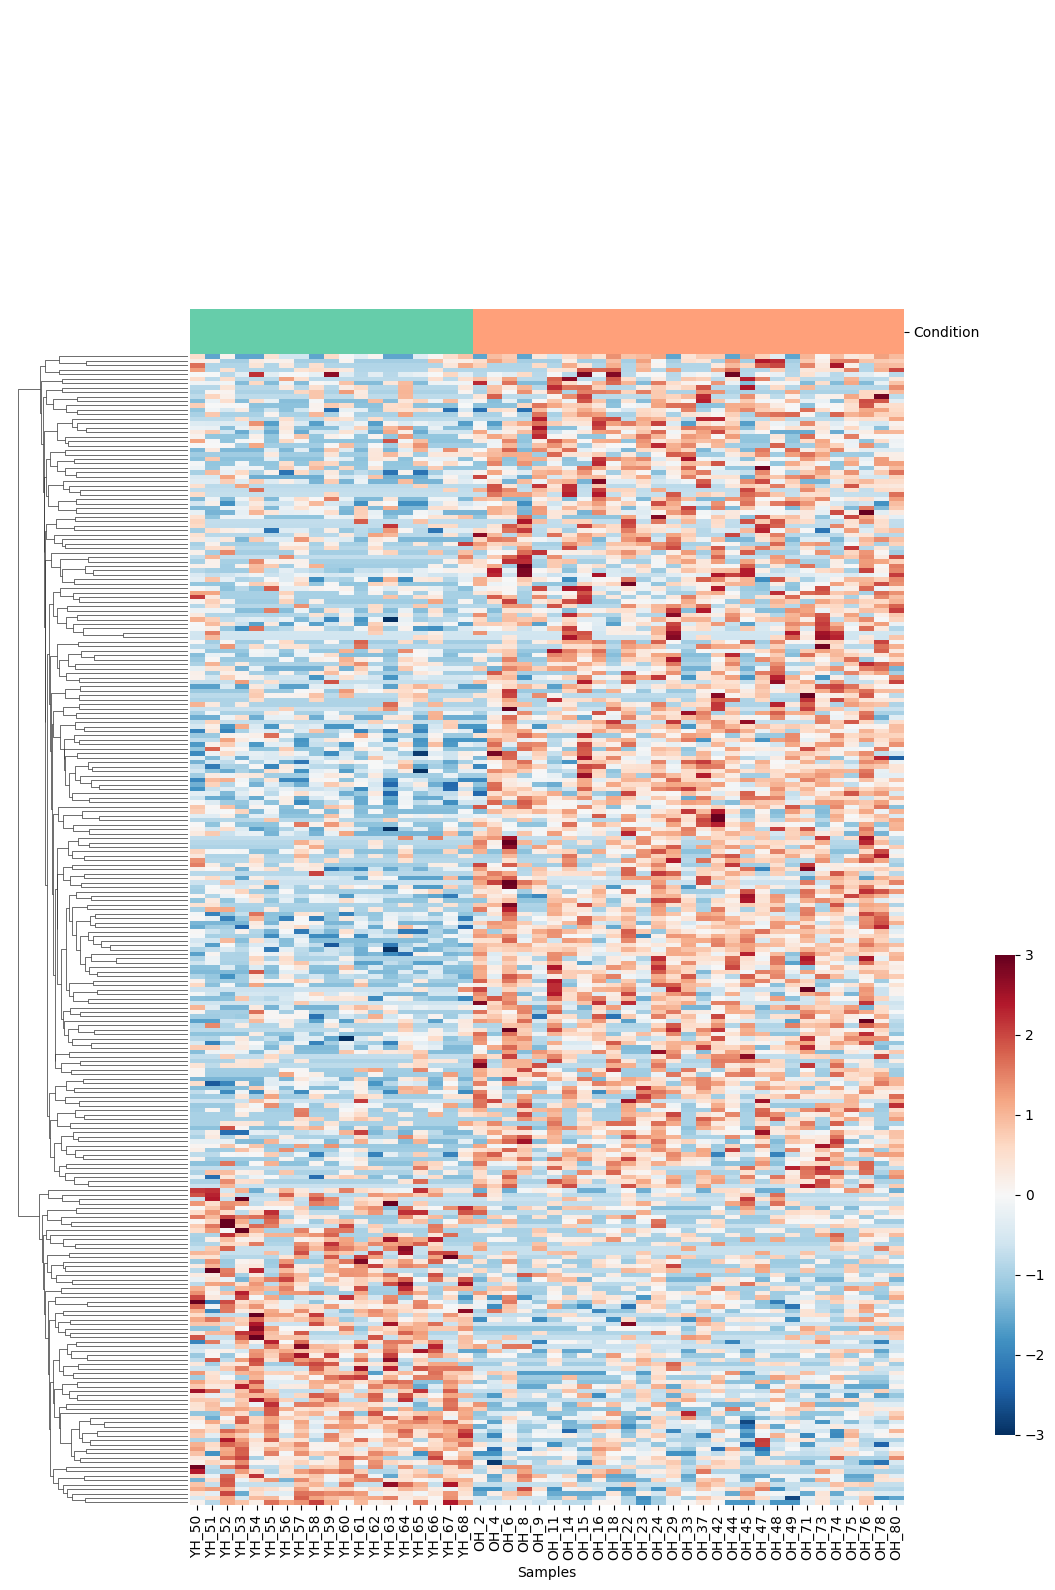

In [308]:
# 히트맵 그리기
sns.clustermap(dds_sigs_expr, 
               z_score=0, # standard_scale=0,
               cmap = 'RdBu_r', 
               center=0,
               xticklabels=True,
               yticklabels=False,
               cbar_pos=(1, 0.1, 0.02, 0.3),
               figsize=(10,16),#(8, 16),
               col_colors=ann_col.map(ann_colors['Group']),
               vmin=-3,
               vmax=3,
               col_cluster=None)
plt.title(f'')
plt.show()

## Volcanoplot

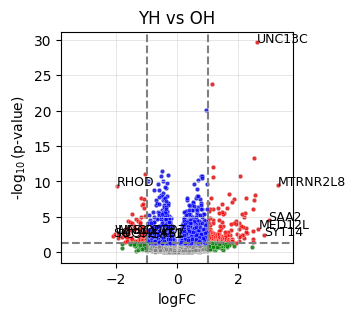

In [11]:
# p-value의 -log10 변환
res['-log10(pvalue)'] = -np.log10(res['pvalue'])

# 임계값 설정
lfc_cutoff = 1
pval_cutoff = 0.05

# 유의한 유전자 필터링
up = res[(res['pvalue'] < pvalue_pval_cutoffthreshold) & (res['log2FoldChange'] > lfc_cutoff)].sort_values(by='log2FoldChange', ascending=False)
down = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'] < -lfc_cutoff)].sort_values(by='log2FoldChange')
middle = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'].between(-lfc_cutoff, lfc_cutoff))]
bottom = res[(res['pvalue'] > pval_cutoff) & ((res['log2FoldChange'] > lfc_cutoff) | (res['log2FoldChange'] < -lfc_cutoff))]

# 볼케이노 플롯 그리기
plt.figure(figsize=(3, 3))

# 기본 플랏
dot_size = 10
sns.scatterplot(data=res, x='log2FoldChange', y='-log10(pvalue)',
                color='grey', label='_nolegend_', alpha = 0.7, s=dot_size)
# Upregulated 유전자 (빨강)
sns.scatterplot(data=up, x='log2FoldChange', y='-log10(pvalue)', 
                color='red', label='_nolegend_', alpha = 0.7, s=dot_size)
# Downregulated 유전자 (빨강)
sns.scatterplot(data=down, x='log2FoldChange', y='-log10(pvalue)', 
                color='red', label='_nolegend_', alpha = 0.7, s=dot_size)
# Middle 유전자 (파랑)
sns.scatterplot(data=middle, x='log2FoldChange', y='-log10(pvalue)',
                color='blue', alpha = 0.7, s=dot_size)
# Bottom 유전자 (초록)
sns.scatterplot(data=bottom, x='log2FoldChange', y='-log10(pvalue)', 
                color='green', alpha = 0.7, s=dot_size)

# 그래프 라인 설정
plt.axhline(y=-np.log10(pval_cutoff), color='grey', linestyle='--')
plt.axvline(x=-lfc_cutoff, color='grey', linestyle='--')
plt.axvline(x=lfc_cutoff, color='grey', linestyle='--')

# x축 범위 조정
max_fc = max(abs(res['log2FoldChange']))
plt.xlim(-max_fc-0.5, max_fc+0.5)
# 그래프 타이틀 및 레전드
plt.title(vol)
plt.xlabel('logFC')
plt.ylabel(r'-$\log_{10}$(p-value)')

# 격자선 추가 및 간격 설정
plt.grid(True, color='lightgrey', linewidth=0.4)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().yaxis.set_major_locator(MultipleLocator(5))

# 유의한 유전자 이름 추가
down = down.head()
for i in range(down.shape[0]):
    plt.text(x=down['log2FoldChange'].iloc[i], 
             y=down['-log10(pvalue)'].iloc[i], 
             s=down.index[i],
             fontsize=9)
up = up.head()
for i in range(up.shape[0]):
    plt.text(x=up['log2FoldChange'].iloc[i], 
             y=up['-log10(pvalue)'].iloc[i], 
             s=up.index[i],
             fontsize=9)
plt.show()

## Boxplot

In [76]:
up = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'] > lfc_cutoff)].sort_values(by='log2FoldChange', ascending=False)
dds_sigs = dds[:, up.index]

In [56]:
down = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'] < -lfc_cutoff)].sort_values(by='log2FoldChange', ascending=True)
dds_sigs = dds[:, down.index]

OH vs YH


/var/folders/zm/q_hkpfmd4c52bmx280q27v980000gn/T/ipykernel_2780/3820933058.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  dds_sigs.obs['Samples'] = dds_sigs.obs['Condition'] + '_' + dds_sigs.obs['Temp'].astype(str)


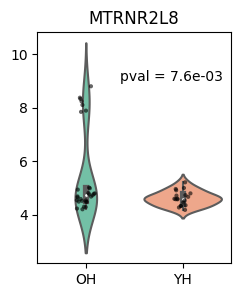

OH vs YH


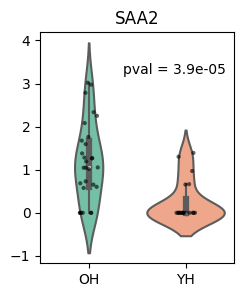

OH vs YH


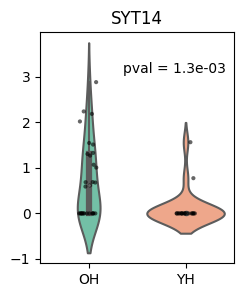

OH vs YH


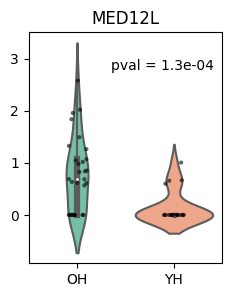

OH vs YH


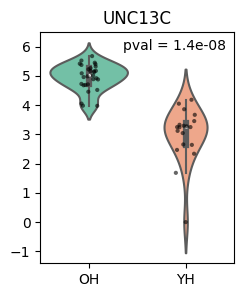

In [80]:
dds_sigs.obs['Samples'] = dds_sigs.obs['Condition'] + '_' + dds_sigs.obs['Temp'].astype(str) 
dds_sigs_expr = pd.DataFrame(np.log1p(dds_sigs.layers['normed_counts']).T,
                       index=dds_sigs.var_names, 
                       columns=dds_sigs.obs.Samples).head()
df =  dds_sigs_expr.T
df['Group'] = df.index.str.split('_').str[0]
df = df.sort_values(by='Group')#, ascending=False)

# 유전자 리스트 (마지막 컬럼은 'Group'이므로 제외)
genes = df.columns[:-1]

# 바이올린 플랏 및 p-value 계산
for gene in genes:
    plt.figure(figsize=(2.5, 3))

    group1 = dic[vol][0]
    group2 = dic[vol][1]

    print(f'{group1} vs {group2}')
    
    # 바이올린 플랏
    sns.violinplot(x='Group', y=gene, data=df.reset_index(), 
                   palette={group1: '#66CDAA', group2: '#FFA07A'}, inner='box')
    sns.stripplot(x='Group', y=gene, data=df.reset_index(), 
                  color='k', size=3, jitter=True, alpha=0.6)

    # p-value 계산
    up_group = df[df['Group'] == group1][gene]
    down_group = df[df['Group'] == group2][gene]
    t_stat, p_value = ttest_ind(up_group, down_group, equal_var=False)
    
    # p-value를 그래프 오른쪽 위에 표기
    plt.text(0.35, max(df[gene]+0.2), f'pval = {p_value:.1e}') 
    plt.title(f'{gene}')
    plt.xlabel('')
    plt.ylabel(f'')
    plt.show()

# GSE111016

In [93]:
osoh = pd.read_csv('./gse111016/osoh/results_GSE111016_osoh_filtered_refit.csv', index_col=0)
with open('./gse111016/osoh/results_GSE111016_osoh_filtered_refit_dds.pkl', 'rb') as f:
    osoh_dds = pickle.load(f)

In [94]:
# 설정
num = 0
res = osoh
dds = osoh_dds

dic = {'OH vs OS' : ['OH','OS']}
vol = list(dic.keys())[num]
dic[vol]

lfc_cutoff = 1
pval_cutoff = 0.05

In [95]:
# p-value의 -log10 변환
res['-log10(pvalue)'] = -np.log10(res['pvalue'])

In [96]:
# 유의한 유전자 필터링
res_sigs = res[(res.pvalue < pval_cutoff)]
res_nosigs = res[(res.pvalue > pval_cutoff)]

# 유의하게 차이나는 유전자 필터링
res_sigs_diff = res_sigs[abs(res_sigs.log2FoldChange) > lfc_cutoff]
res_sigs_up = res_sigs[res_sigs['log2FoldChange'] > lfc_cutoff].sort_values(by='log2FoldChange', ascending=False)
res_sigs_down = res_sigs[res_sigs['log2FoldChange'] < -lfc_cutoff].sort_values(by='log2FoldChange', ascending=True)
res_sigs_middle = res_sigs[res_sigs['log2FoldChange'].between(-lfc_cutoff, lfc_cutoff)]

# 유의하지는 않지만 차이나는 유전자 필터링
res_nosigs_bottom = res_nosigs[(res_nosigs['log2FoldChange'] > lfc_cutoff) | (res_nosigs['log2FoldChange'] < -lfc_cutoff)]

In [97]:
# 유의한 유전자 개수 추출
print(f"Up-regulated: {len(res_sigs_up)}")
print(f"Down-regulated: {len(res_sigs_down)}")
print(f"Intersected: {len(res_sigs) - len(res_sigs_diff)}")
print(f"Total: {len(res_sigs)}") 

Up-regulated: 28
Down-regulated: 4
Intersected: 2146
Total: 2178


## Heatmap

In [98]:
# 히트맵에 표시할 인덱스 생성
dds.obs['Sample'] = dds.obs.index
dds.obs['Temp'] = dds.obs['Sample'].apply(lambda x:x.split(' ')[-1]).astype(int)

dds_sigs = dds[:, res_sigs_diff.index]
# dds expression table (counts는 normalized 사용)
dds_expr = pd.DataFrame(np.log1p(dds.layers['normed_counts']).T,
                             index=dds.var_names, 
                             columns=dds.obs.Samples)
dds_sigs_expr = dds_expr.loc[res_sigs_diff.index]


In [99]:
# 그룹별 및 환자별 인덱스 정렬을 위한 리스트 생성
dds.obs['Samples'] = dds.obs.index.astype(str) + '_' + dds.obs['Condition']
my_order = dds.obs.sort_values(by=['Condition', 'Temp'], ascending=[True, True])['Samples'].values
my_order

array(['Sample 1_OH', 'Sample 2_OH', 'Sample 5_OH', 'Sample 6_OH',
       'Sample 9_OH', 'Sample 10_OH', 'Sample 13_OH', 'Sample 14_OH',
       'Sample 17_OH', 'Sample 18_OH', 'Sample 20_OH', 'Sample 21_OH',
       'Sample 23_OH', 'Sample 24_OH', 'Sample 26_OH', 'Sample 27_OH',
       'Sample 29_OH', 'Sample 32_OH', 'Sample 35_OH', 'Sample 38_OH',
       'Sample 3_OS', 'Sample 4_OS', 'Sample 7_OS', 'Sample 8_OS',
       'Sample 11_OS', 'Sample 12_OS', 'Sample 15_OS', 'Sample 16_OS',
       'Sample 19_OS', 'Sample 22_OS', 'Sample 25_OS', 'Sample 28_OS',
       'Sample 30_OS', 'Sample 31_OS', 'Sample 33_OS', 'Sample 34_OS',
       'Sample 36_OS', 'Sample 37_OS', 'Sample 39_OS', 'Sample 40_OS'],
      dtype=object)

In [100]:
# dds_sigs_expr 행렬 정렬
dds_sigs_expr = dds_sigs_expr.T
dds_sigs_expr = dds_sigs_expr.reindex(my_order).T

In [101]:
dic[vol][0], dic[vol][1]

('OH', 'OS')

In [102]:
# 어노테이션 설정
ann_col = dds_sigs.obs['Condition']
ann_col.index = dds_sigs.obs['Samples']

# 애노테이션 색상 설정
ann_colors = {'Group': {dic[vol][0]: '#66CDAA', dic[vol][1]: '#FFA07A'}} # 초록 66CDAA, 분 FFA07A

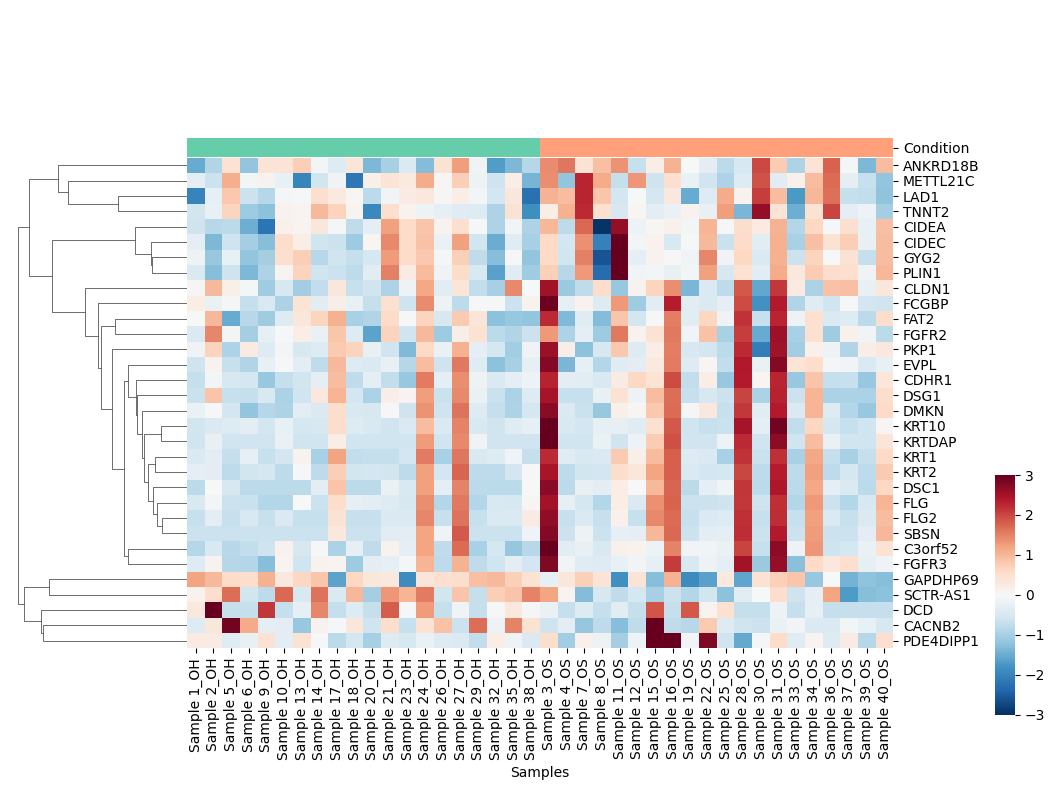

In [103]:
# 히트맵 그리기
sns.clustermap(dds_sigs_expr, 
               z_score=0, # standard_scale=0,
               cmap = 'RdBu_r', 
               center=0,
               xticklabels=True,
               yticklabels=True,
               cbar_pos=(1, 0.1, 0.02, 0.3),
               figsize=(10,8), #(10,16),#(8, 16),
               col_colors=ann_col.map(ann_colors['Group']),
               vmin=-3,
               vmax=3,
               col_cluster=None)
plt.title(f'')
plt.show()

## volcanoplot

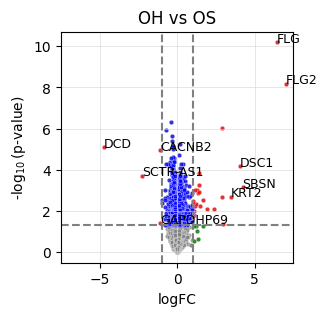

In [104]:
# 볼케이노 플롯 그리기
plt.figure(figsize=(3, 3))

# 기본 플랏
dot_size = 10
alpha_value = 0.7
sns.scatterplot(data=res, x='log2FoldChange', y='-log10(pvalue)',
                color='grey', label='_nolegend_', alpha=alpha_value, s=dot_size)
# 유의한 유전자 (빨강)
sns.scatterplot(data=res_sigs_diff, x='log2FoldChange', y='-log10(pvalue)', 
                color='red', label='_nolegend_', alpha=alpha_value, s=dot_size)
sns.scatterplot(data=res_sigs_middle, x='log2FoldChange', y='-log10(pvalue)',
                color='blue', alpha=alpha_value, s=dot_size)
# 유의하지 않은 유전자 (초록)
sns.scatterplot(data=res_nosigs_bottom, x='log2FoldChange', y='-log10(pvalue)', 
                color='green', alpha=alpha_value, s=dot_size)

# 그래프 라인 설정
plt.axhline(y=-np.log10(pval_cutoff), color='grey', linestyle='--')
plt.axvline(x=-lfc_cutoff, color='grey', linestyle='--')
plt.axvline(x=lfc_cutoff, color='grey', linestyle='--')

# x축 범위 조정
max_fc = max(abs(res['log2FoldChange']))
plt.xlim(-max_fc-0.5, max_fc+0.5)

# 그래프 타이틀 및 레전드
plt.title(vol)
plt.xlabel('logFC')
plt.ylabel(r'-$\log_{10}$(p-value)')

# 격자선 추가 및 간격 설정
plt.grid(True, color='lightgrey', linewidth=0.4)
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().yaxis.set_major_locator(MultipleLocator(2))

# 유의한 유전자 이름 추가
res_sigs_up_genes = res_sigs_up.head()
for i in range(res_sigs_up_genes.shape[0]):
    plt.text(x=res_sigs_up_genes['log2FoldChange'].iloc[i], 
             y=res_sigs_up_genes['-log10(pvalue)'].iloc[i], 
             s=res_sigs_up_genes.index[i],
             fontsize=9)

res_sigs_down_genes = res_sigs_down.head()
for i in range(res_sigs_down_genes.shape[0]):
    plt.text(x=res_sigs_down_genes['log2FoldChange'].iloc[i], 
             y=res_sigs_down_genes['-log10(pvalue)'].iloc[i], 
             s=res_sigs_down_genes.index[i],
             fontsize=9)
plt.show()

## Violinplot

In [105]:
# up-regulated & down-regulated dds expression matrix 정의
dds_sigs_expr_up = dds_expr.loc[res_sigs_up.index]
dds_sigs_expr_down = dds_expr.loc[res_sigs_down.index]

In [106]:
# top 5 유전자 정의
dds_sigs_expr_up_top5 = dds_sigs_expr_down.head().T
dds_sigs_expr_down_top5 = dds_sigs_expr_down.head().T

In [107]:
res.loc[res_sigs_up.index].head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10(pvalue)
FLG2,152.624179,6.995162,1.205364,5.803362,6.499819e-09,NaN,8.187099
FLG,265.626973,6.426085,0.983308,6.535169,6.353781e-11,NaN,10.196968
SBSN,24.052680,4.214418,1.244809,3.385595,7.102418e-04,NaN,3.148594
DSC1,24.451829,4.033373,1.009409,3.995777,6.448243e-05,NaN,4.190559
KRT2,100.409030,3.484995,1.126407,3.093902,1.975424e-03,NaN,2.704340


In [108]:
res.loc[res_sigs_down.index]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10(pvalue)
DCD,15.097435,-4.713148,1.054315,-4.470343,0.000008,NaN,5.107380
SCTR-AS1,42.523873,-2.260322,0.605540,-3.732739,0.000189,NaN,3.722600
CACNB2,77.405645,-1.102219,0.251100,-4.389562,0.000011,NaN,4.944702
GAPDHP69,83.042072,-1.081649,0.527414,-2.050853,0.040281,NaN,1.394897


In [20]:

gene = 'DCD' # 'FLG2'
df = dds_expr.T

# group 설정
df['Group'] = df.index.str.split('_').str[-1]

group1 = dic[vol][0]
group2 = dic[vol][1]

# p-value 계산
up_group = df[df['Group'] == group1][gene]
down_group = df[df['Group'] == group2][gene]
t_stat, p_value = ttest_ind(up_group, down_group, equal_var=False)
print(f'{gene}: {t_stat}, {p_value}')

DCD: 1.5713067034744654, 0.12540655019495278


OH vs OS


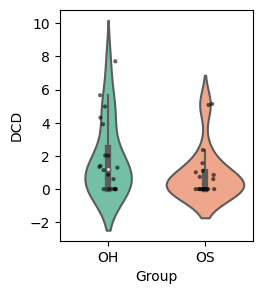

In [37]:
plt.figure(figsize=(2.5, 3))

group1 = dic[vol][0]
group2 = dic[vol][1]

print(f'{group1} vs {group2}')

# 바이올린 플랏
sns.violinplot(x='Group', y=gene, data=df.reset_index(), 
           palette={group1: '#66CDAA', group2: '#FFA07A'}, inner='box')
sns.stripplot(x='Group', y=gene, data=df.reset_index(), 
          color='k', size=3, jitter=True, alpha=0.6)
plt.show()

OH vs OS


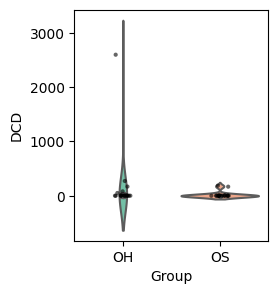

In [37]:
# raw count
plt.figure(figsize=(2.5, 3))

group1 = dic[vol][0]
group2 = dic[vol][1]

print(f'{group1} vs {group2}')

# 바이올린 플랏
sns.violinplot(x='Group', y=gene, data=df.reset_index(), 
           palette={group1: '#66CDAA', group2: '#FFA07A'}, inner='box')
sns.stripplot(x='Group', y=gene, data=df.reset_index(), 
          color='k', size=3, jitter=True, alpha=0.6)
plt.show()

OH vs OS


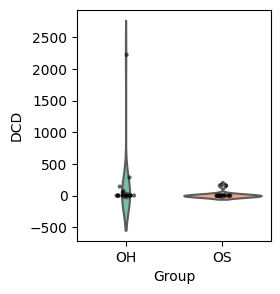

In [55]:
# raw count
plt.figure(figsize=(2.5, 3))

group1 = dic[vol][0]
group2 = dic[vol][1]

print(f'{group1} vs {group2}')

# 바이올린 플랏
sns.violinplot(x='Group', y=gene, data=df.reset_index(), 
           palette={group1: '#66CDAA', group2: '#FFA07A'}, inner='box')
sns.stripplot(x='Group', y=gene, data=df.reset_index(), 
          color='k', size=3, jitter=True, alpha=0.6)
plt.show()

OH vs OS


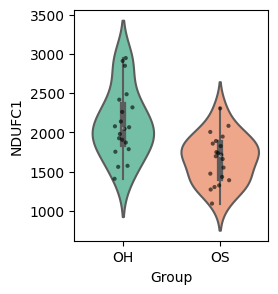

In [76]:
gene = 'NDUFC1'
# raw count
plt.figure(figsize=(2.5, 3))

group1 = dic[vol][0]
group2 = dic[vol][1]

print(f'{group1} vs {group2}')

# 바이올린 플랏
sns.violinplot(x='Group', y=gene, data=df.reset_index(), 
           palette={group1: '#66CDAA', group2: '#FFA07A'}, inner='box')
sns.stripplot(x='Group', y=gene, data=df.reset_index(), 
          color='k', size=3, jitter=True, alpha=0.6)
plt.show()

In [77]:
df = dds_expr.T

# group 설정
df['Group'] = df.index.str.split('_').str[-1]

group1 = dic[vol][0]
group2 = dic[vol][1]

# p-value 계산
up_group = df[df['Group'] == group1][gene]
down_group = df[df['Group'] == group2][gene]
t_stat, p_value = ttest_ind(up_group, down_group, equal_var=False)
print(f'{gene}: {t_stat}, {p_value}')

NDUFC1: 3.7338250207972115, 0.0006866007831688494


OH vs OS


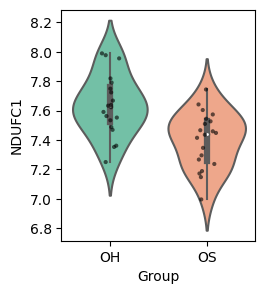

In [109]:
gene = 'NDUFC1'
# raw count
plt.figure(figsize=(2.5, 3))

group1 = dic[vol][0]
group2 = dic[vol][1]

print(f'{group1} vs {group2}')

# 바이올린 플랏
sns.violinplot(x='Group', y=gene, data=df.reset_index(), 
           palette={group1: '#66CDAA', group2: '#FFA07A'}, inner='box')
sns.stripplot(x='Group', y=gene, data=df.reset_index(), 
          color='k', size=3, jitter=True, alpha=0.6)
plt.show()

In [110]:
df = dds_expr.T

# group 설정
df['Group'] = df.index.str.split('_').str[-1]

group1 = dic[vol][0]
group2 = dic[vol][1]

# p-value 계산
up_group = df[df['Group'] == group1][gene]
down_group = df[df['Group'] == group2][gene]
t_stat, p_value = ttest_ind(up_group, down_group, equal_var=False)
print(f'{gene}: {t_stat}, {p_value}')

NDUFC1: 3.7908921112635108, 0.0005246738315122909


### 바이올린 플랏

OH vs OS


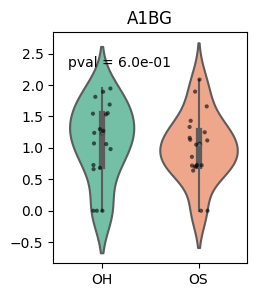

OH vs OS


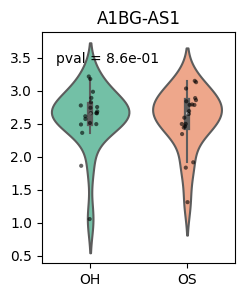

OH vs OS


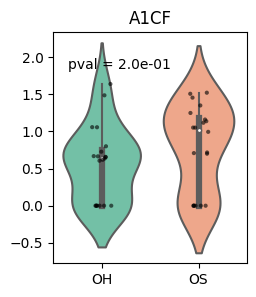

OH vs OS


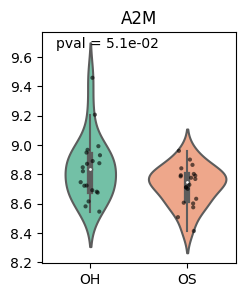

OH vs OS


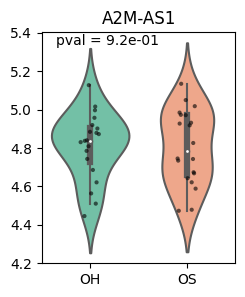

OH vs OS


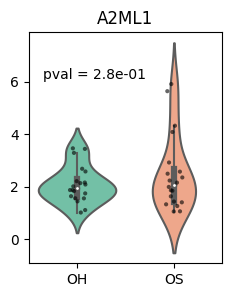

OH vs OS


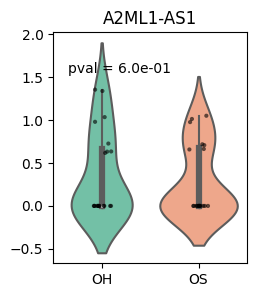

OH vs OS


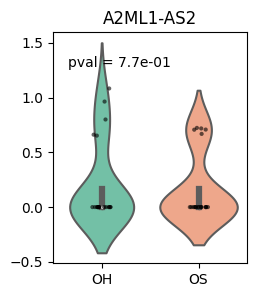

OH vs OS


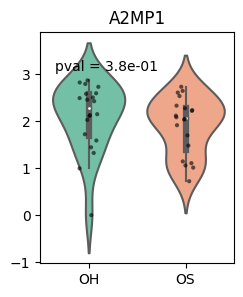

OH vs OS


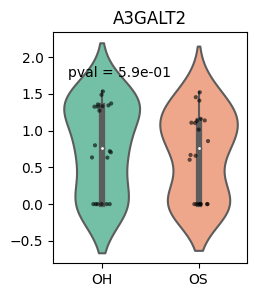

OH vs OS


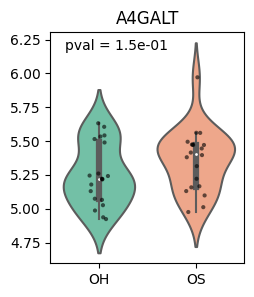

OH vs OS


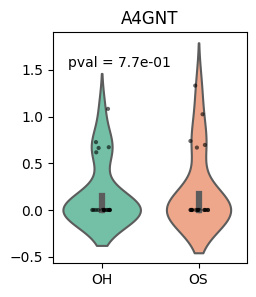

OH vs OS


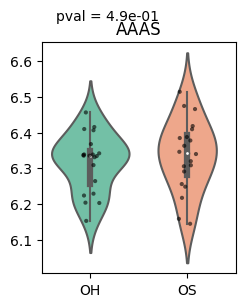

OH vs OS


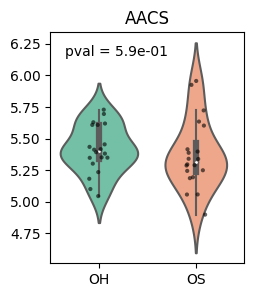

OH vs OS


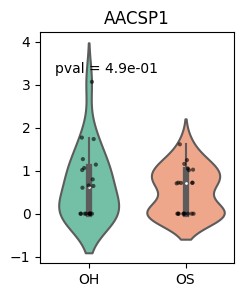

OH vs OS


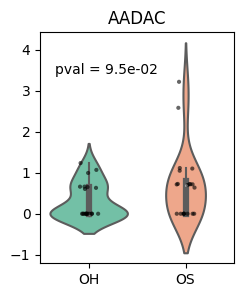

OH vs OS


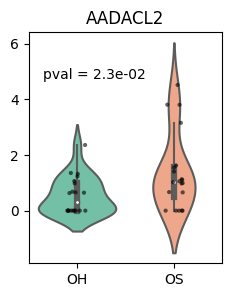

OH vs OS


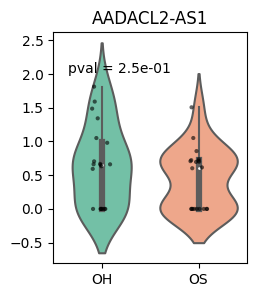

OH vs OS


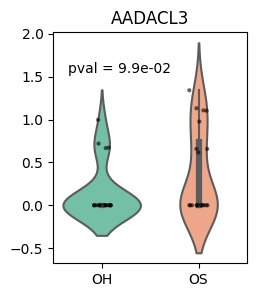

OH vs OS


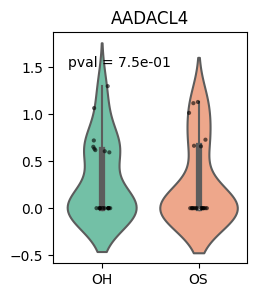

OH vs OS


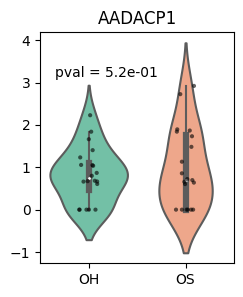

OH vs OS


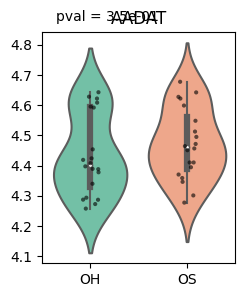

OH vs OS


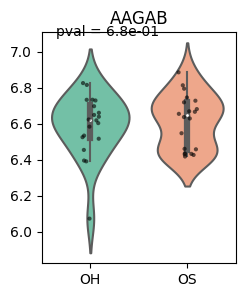

OH vs OS


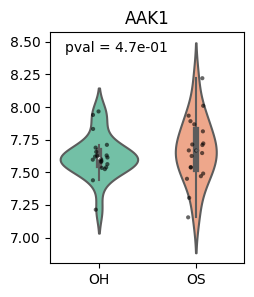

OH vs OS


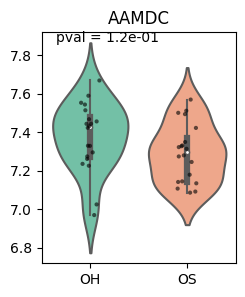

OH vs OS


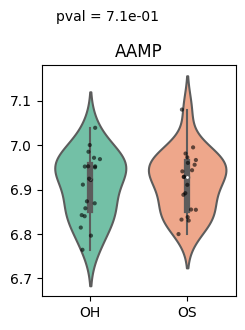

OH vs OS


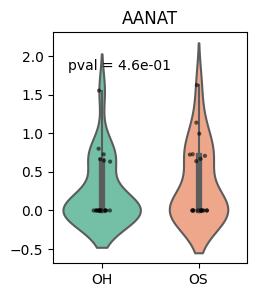

OH vs OS


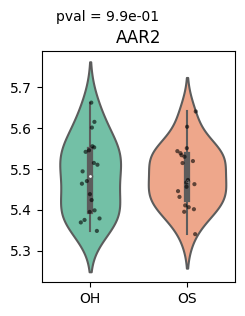

OH vs OS


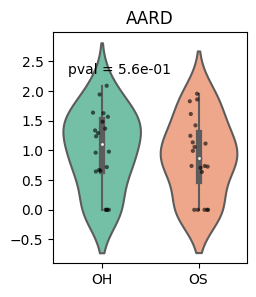

OH vs OS


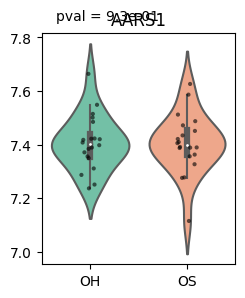

OH vs OS


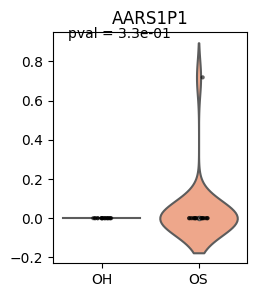

OH vs OS


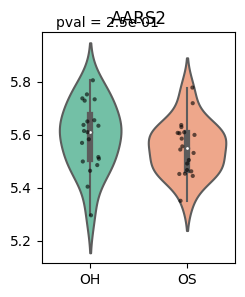

OH vs OS


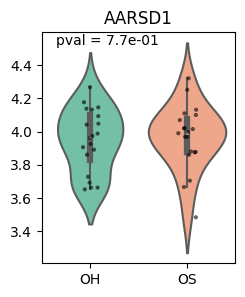

OH vs OS


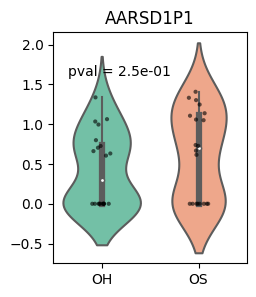

OH vs OS


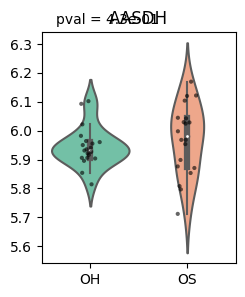

OH vs OS


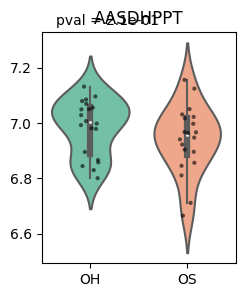

OH vs OS


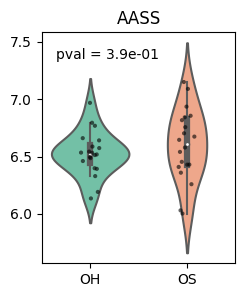

OH vs OS


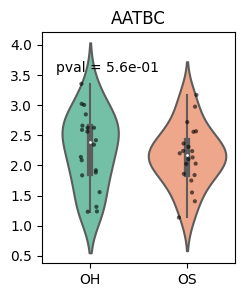

OH vs OS


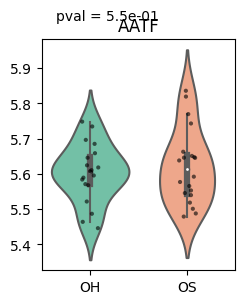

OH vs OS


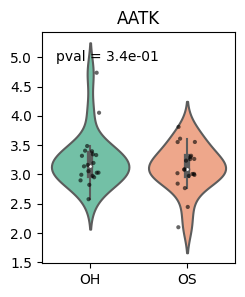

OH vs OS


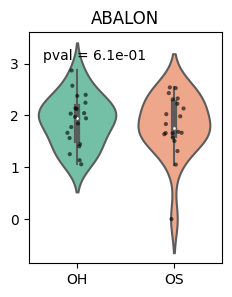

OH vs OS


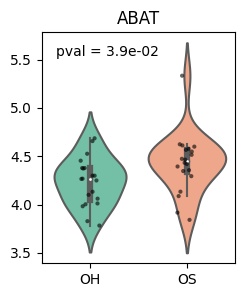

OH vs OS


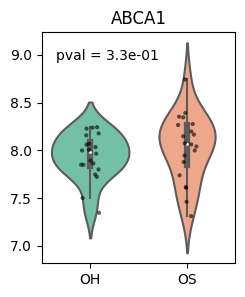

OH vs OS


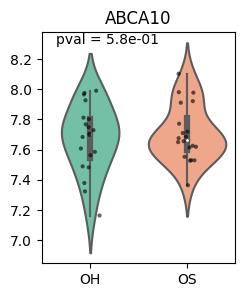

OH vs OS


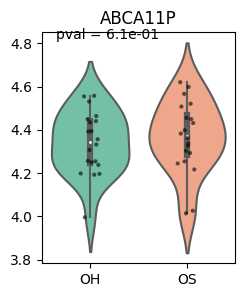

OH vs OS


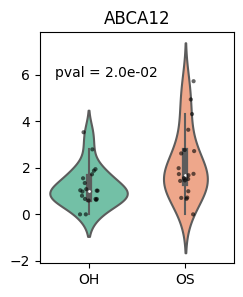

OH vs OS


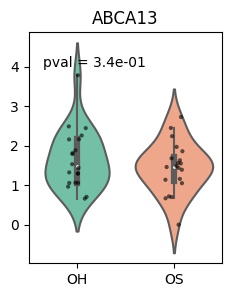

OH vs OS


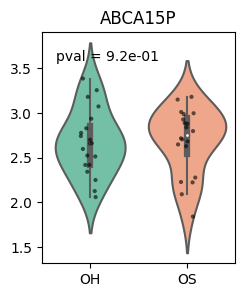

OH vs OS


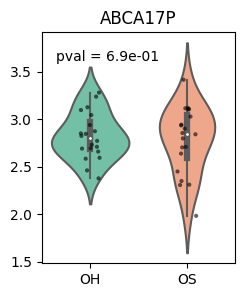

OH vs OS


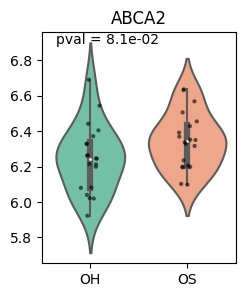

OH vs OS


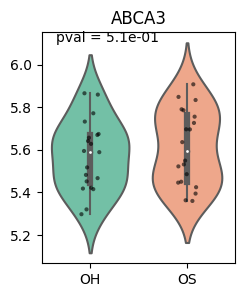

OH vs OS


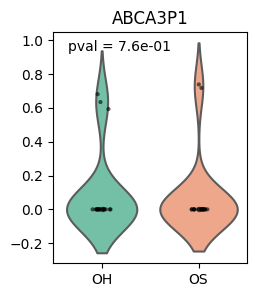

OH vs OS


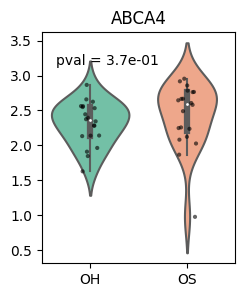

OH vs OS


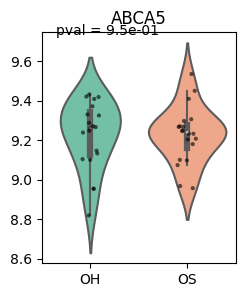

OH vs OS


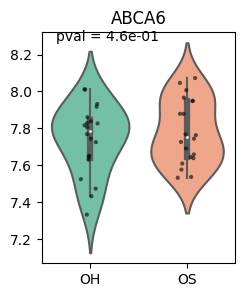

OH vs OS


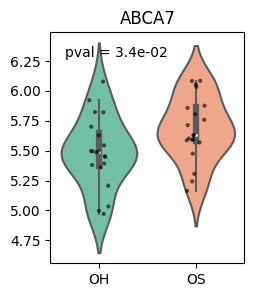

OH vs OS


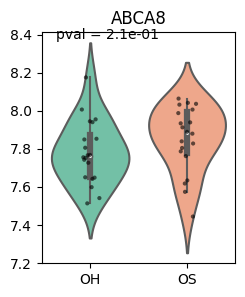

OH vs OS


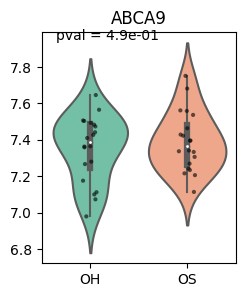

OH vs OS


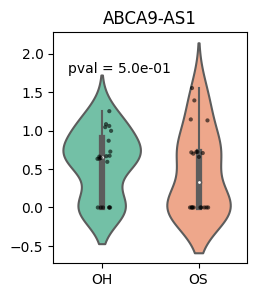

OH vs OS


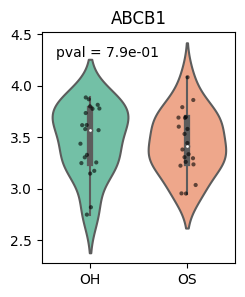

OH vs OS


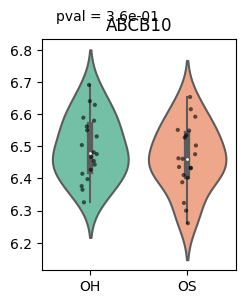

OH vs OS


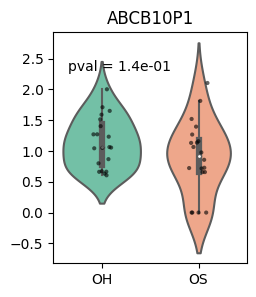

OH vs OS


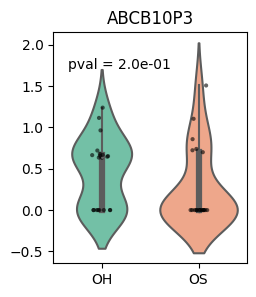

OH vs OS


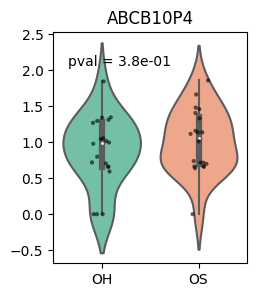

OH vs OS


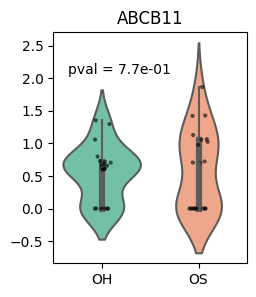

OH vs OS


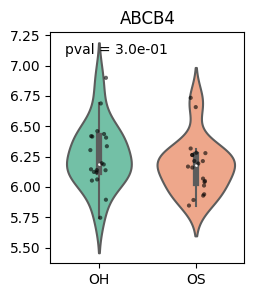

OH vs OS


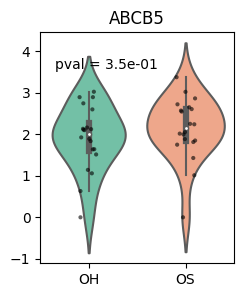

OH vs OS


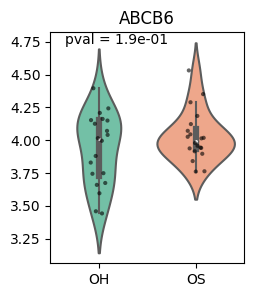

OH vs OS


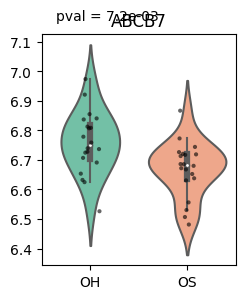

OH vs OS


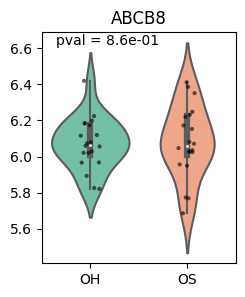

OH vs OS


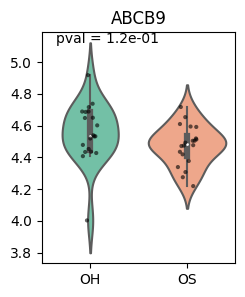

OH vs OS


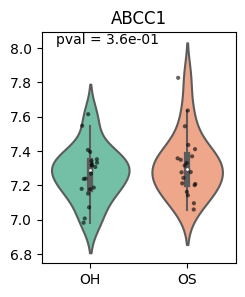

OH vs OS


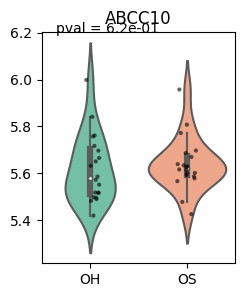

OH vs OS


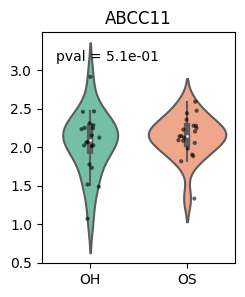

OH vs OS


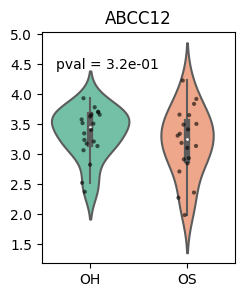

OH vs OS


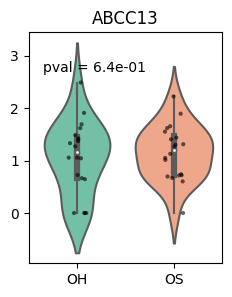

OH vs OS


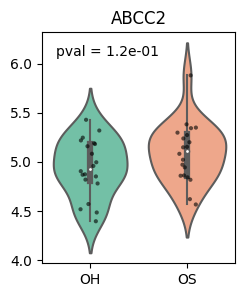

OH vs OS


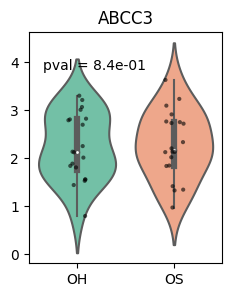

OH vs OS


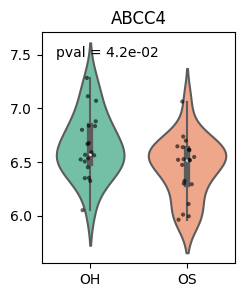

OH vs OS


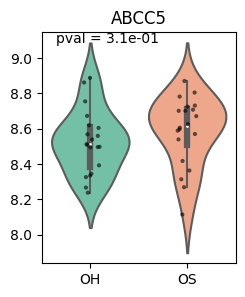

OH vs OS


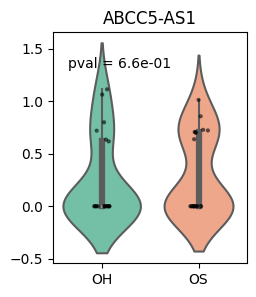

OH vs OS


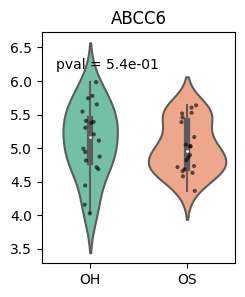

OH vs OS


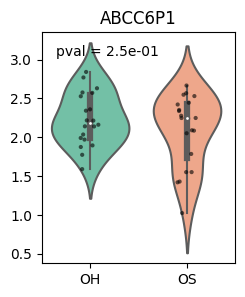

OH vs OS


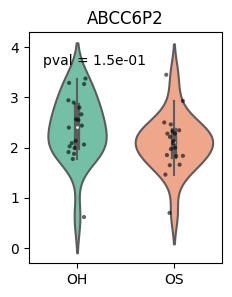

OH vs OS


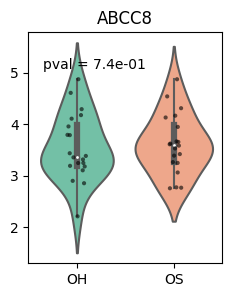

OH vs OS


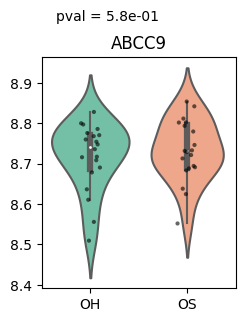

OH vs OS


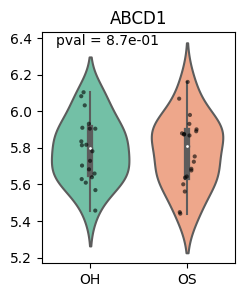

OH vs OS


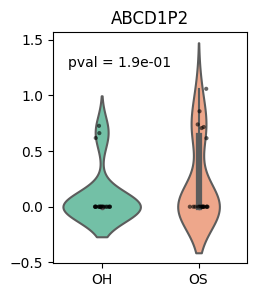

OH vs OS


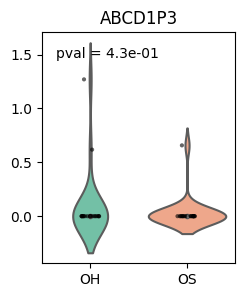

OH vs OS


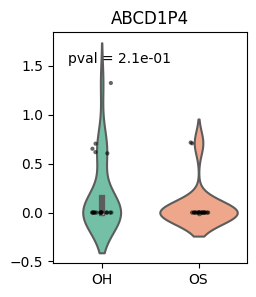

OH vs OS


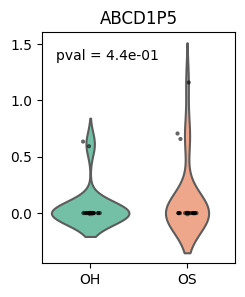

OH vs OS


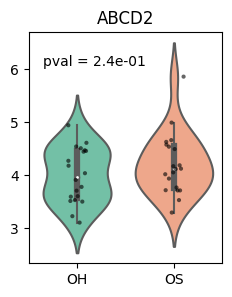

OH vs OS


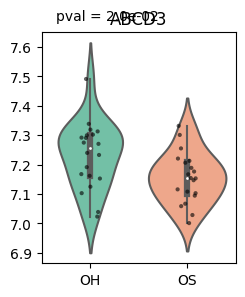

OH vs OS


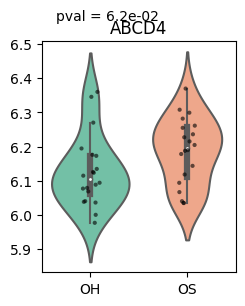

OH vs OS


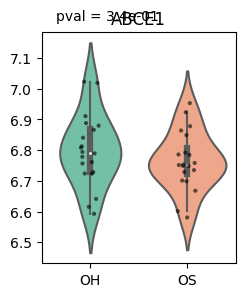

OH vs OS


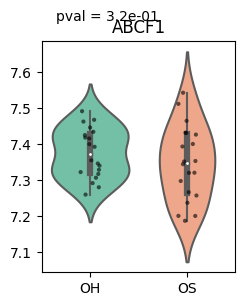

OH vs OS


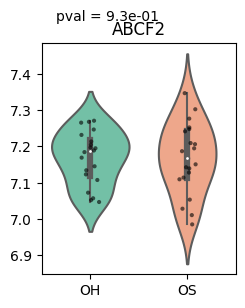

OH vs OS


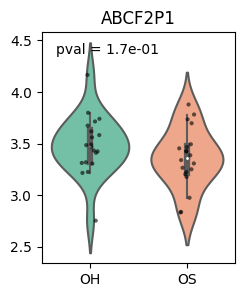

OH vs OS


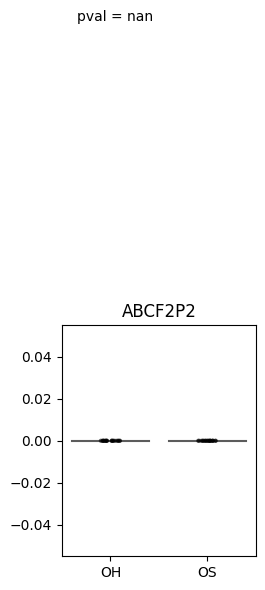

OH vs OS


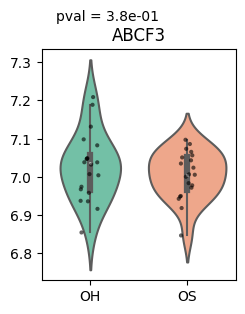

OH vs OS


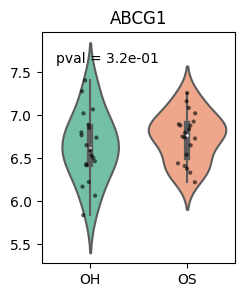

OH vs OS


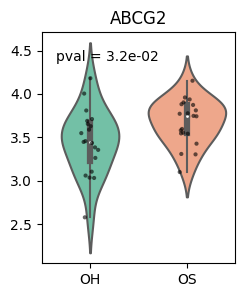

OH vs OS


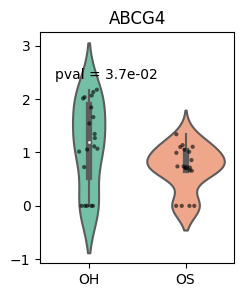

OH vs OS


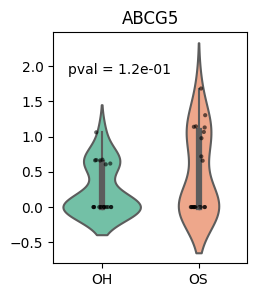

OH vs OS


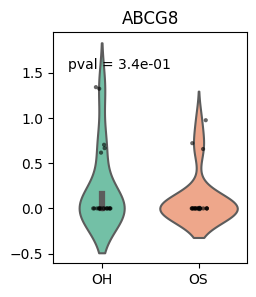

OH vs OS


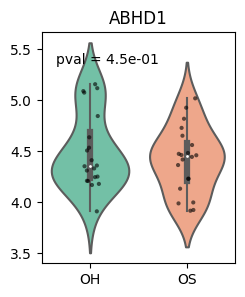

OH vs OS


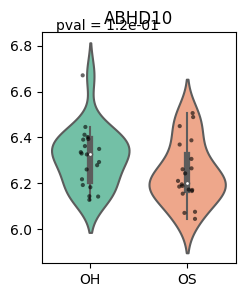

OH vs OS


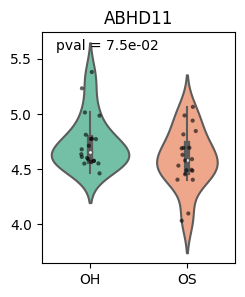

OH vs OS


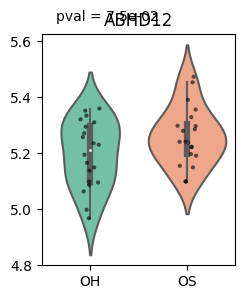

OH vs OS


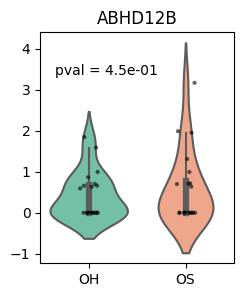

OH vs OS


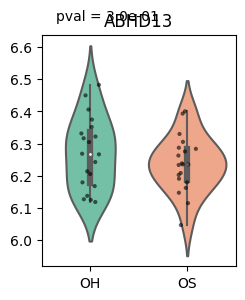

OH vs OS


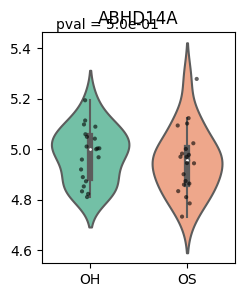

OH vs OS


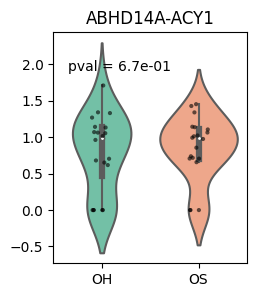

OH vs OS


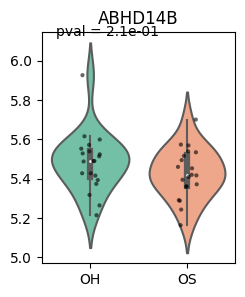

OH vs OS


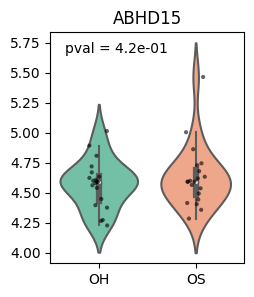

OH vs OS


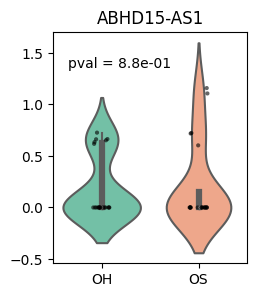

OH vs OS


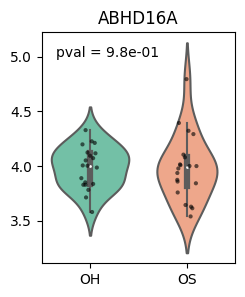

OH vs OS


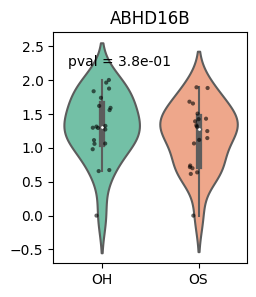

OH vs OS


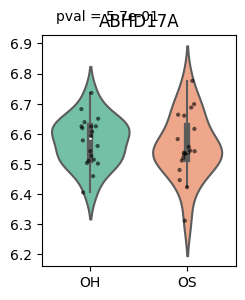

OH vs OS


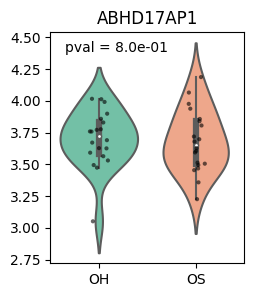

OH vs OS


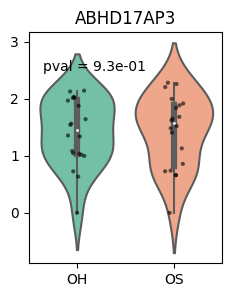

OH vs OS


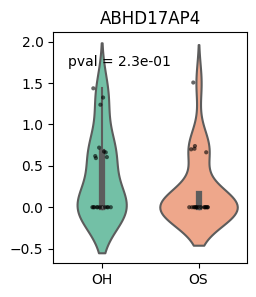

OH vs OS


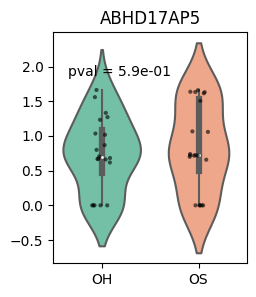

OH vs OS


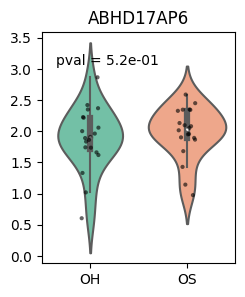

OH vs OS


KeyboardInterrupt: 

In [34]:
df['Group'] = df.index.str.split('_').str[-1]
df = df.sort_values(by='Group')#, ascending=False)

# 유전자 리스트 (마지막 컬럼은 'Group'이므로 제외)
genes = df.columns[:-1]

# 바이올린 플랏 및 p-value 계산
for gene in genes:
    plt.figure(figsize=(2.5, 3))
    
    group1 = dic[vol][0]
    group2 = dic[vol][1]
    
    print(f'{group1} vs {group2}')
    
    # 바이올린 플랏
    sns.violinplot(x='Group', y=gene, data=df.reset_index(), 
                   palette={group1: '#66CDAA', group2: '#FFA07A'}, inner='box')
    sns.stripplot(x='Group', y=gene, data=df.reset_index(), 
                  color='k', size=3, jitter=True, alpha=0.6)
    
    # p-value 계산
    up_group = df[df['Group'] == group1][gene]
    down_group = df[df['Group'] == group2][gene]
    t_stat, p_value = ttest_ind(up_group, down_group, equal_var=False)
    
    # p-value를 그래프 오른쪽 위에 표기
    plt.text(-0.35, max(df[gene]+0.2), f'pval = {p_value:.1e}') 
    plt.title(f'{gene}')
    plt.xlabel('')
    plt.ylabel(f'')
    plt.show()

# Combined

In [19]:
res = pd.read_csv('results_combined_yhoh_multi.csv', index_col=0)
with open('results_combined_yhoh_multi.pkl', 'rb') as f:
    dds = pickle.load(f)

In [20]:
lfc_cutoff = 1

# DataFrame 생성 --------
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

res_sigs = res[(res.pvalue < 0.05) & (abs(res.log2FoldChange) > lfc_cutoff)]
print(f"Total gene counts: {len(res[res.pvalue < 0.05])}") 
print(f"Up-regulated: {len(res[(res.pvalue < 0.05) & (res.log2FoldChange > lfc_cutoff)])}")
print(f"Down-regulated: {len(res[(res.pvalue < 0.05) & (res.log2FoldChange < -lfc_cutoff)])}")
print(f"Intersected gene counts: {len(res[res.pvalue < 0.05])-len(res[(res.pvalue < 0.05) & (abs(res.log2FoldChange) > lfc_cutoff)])}")

dds_sigs = dds[:, res_sigs.index]

Total gene counts: 2565
Up-regulated: 179
Down-regulated: 62
Intersected gene counts: 2324


In [13]:
# 새로운 인덱스 달아줌
dds_sigs.obs['Samples'] = dds_sigs.obs['Sample'] + '_' + dds_sigs.obs['Condition'].astype(str) 
dds_sigs_expr = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, 
                       columns=dds_sigs.obs.Samples)
res['Symbol'] = res.index

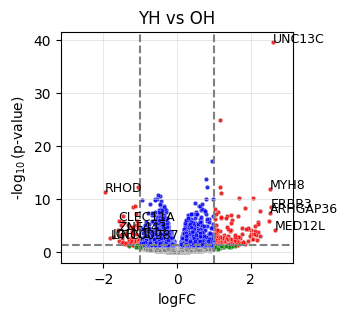

In [14]:
# p-value의 -log10 변환
res['-log10(pvalue)'] = -np.log10(res['pvalue'])

# 임계값 설정
lfc_cutoff = 1
pval_cutoff = 0.05

# 유의한 유전자 필터링
up = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'] > lfc_cutoff)].sort_values(by='log2FoldChange', ascending=False)
down = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'] < -lfc_cutoff)].sort_values(by='log2FoldChange')
middle = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'].between(-lfc_cutoff, lfc_cutoff))]
bottom = res[(res['pvalue'] > pval_cutoff) & ((res['log2FoldChange'] > lfc_cutoff) | (res['log2FoldChange'] < -lfc_cutoff))]

# 볼케이노 플롯 그리기
plt.figure(figsize=(3, 3))

# 기본 플랏
dot_size = 10
sns.scatterplot(data=res, x='log2FoldChange', y='-log10(pvalue)',
                color='grey', label='_nolegend_', alpha = 0.7, s=dot_size)
# Upregulated 유전자 (빨강)
sns.scatterplot(data=up, x='log2FoldChange', y='-log10(pvalue)', 
                color='red', label='_nolegend_', alpha = 0.7, s=dot_size)
# Downregulated 유전자 (빨강)
sns.scatterplot(data=down, x='log2FoldChange', y='-log10(pvalue)', 
                color='red', label='_nolegend_', alpha = 0.7, s=dot_size)
# Middle 유전자 (파랑)
sns.scatterplot(data=middle, x='log2FoldChange', y='-log10(pvalue)',
                color='blue', alpha = 0.7, s=dot_size)
# Bottom 유전자 (초록)
sns.scatterplot(data=bottom, x='log2FoldChange', y='-log10(pvalue)', 
                color='green', alpha = 0.7, s=dot_size)

# 그래프 라인 설정
plt.axhline(y=-np.log10(pvalue_threshold), color='grey', linestyle='--')
plt.axvline(x=-lfc_cutoff, color='grey', linestyle='--')
plt.axvline(x=lfc_cutoff, color='grey', linestyle='--')

# x축 범위 조정
max_fc = max(abs(res['log2FoldChange']))
plt.xlim(-max_fc-0.5, max_fc+0.5)

# 그래프 타이틀 및 레전드
plt.title('YH vs OH')
plt.xlabel('logFC')
plt.ylabel(r'-$\log_{10}$(p-value)')

# 격자선 추가 및 간격 설정
plt.grid(True, color='lightgrey', linewidth=0.4)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
# plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

# 유의한 유전자 이름 추가
down = down.head()
for i in range(down.shape[0]):
    plt.text(x=down['log2FoldChange'].iloc[i], 
             y=down['-log10(pvalue)'].iloc[i], 
             s=down.index[i],
             fontsize=9)
up = up.head()
for i in range(up.shape[0]):
    plt.text(x=up['log2FoldChange'].iloc[i], 
             y=up['-log10(pvalue)'].iloc[i], 
             s=up.index[i],
             fontsize=9)
plt.show()

In [17]:
up = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'] > lfc_cutoff)].sort_values(by='log2FoldChange', ascending=False)
dds_sigs = dds[:, up.index]

In [16]:
down = res[(res['pvalue'] < pval_cutoff) & (res['log2FoldChange'] < -lfc_cutoff)].sort_values(by='log2FoldChange', ascending=True)
dds_sigs = dds[:, down.index]

In [24]:
my = res[res.index == 'HIF1']
dds_sigs = dds[:, my.index]

In [29]:
res[res.index=='HIF.1']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10(pvalue),Symbol


In [25]:
# 새로운 인덱스 달아줌
dds_sigs.obs['Samples'] = dds_sigs.obs.index.astype(str) + '_' + dds_sigs.obs['Condition'] 
dds_sigs_expr = pd.DataFrame(dds_sigs.layers['log1p'].T, 
                       index=dds_sigs.var_names, 
                       columns=dds_sigs.obs.Samples).head()
df =  dds_sigs_expr.T

df['Group'] = df.index.str.split('_').str[-1]
df = df.sort_values(by='Group', ascending=False)

# 유전자 리스트 (마지막 컬럼은 'Group'이므로 제외)
genes = df.columns[:-1]

# 바이올린 플랏 및 p-value 계산
for gene in genes:
    plt.figure(figsize=(2.5, 3))
    
    # 바이올린 플랏
    sns.violinplot(x='Group', y=gene, data=df.reset_index(), palette={'YH': '#66CDAA', 'OH': '#FFA07A'}, inner='box')
    sns.stripplot(x='Group', y=gene, data=df.reset_index(), color='k', size=3, jitter=True, alpha=0.6)

    # p-value 계산
    os_group = df[df['Group'] == 'OH'][gene]
    oh_group = df[df['Group'] == 'YH'][gene]
    t_stat, p_value = ttest_ind(os_group, oh_group, equal_var=False)
    
    # p-value를 그래프 오른쪽 위에 표기
    plt.text(0.35, max(df[gene]+0.2), f'pval = {p_value:.1e}') 
    plt.title(f'{gene}')
    plt.xlabel('')
    plt.ylabel(f'')
    plt.show()

/var/folders/zm/q_hkpfmd4c52bmx280q27v980000gn/T/ipykernel_5102/3098417808.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  dds_sigs.obs['Samples'] = dds_sigs.obs.index.astype(str) + '_' + dds_sigs.obs['Condition']


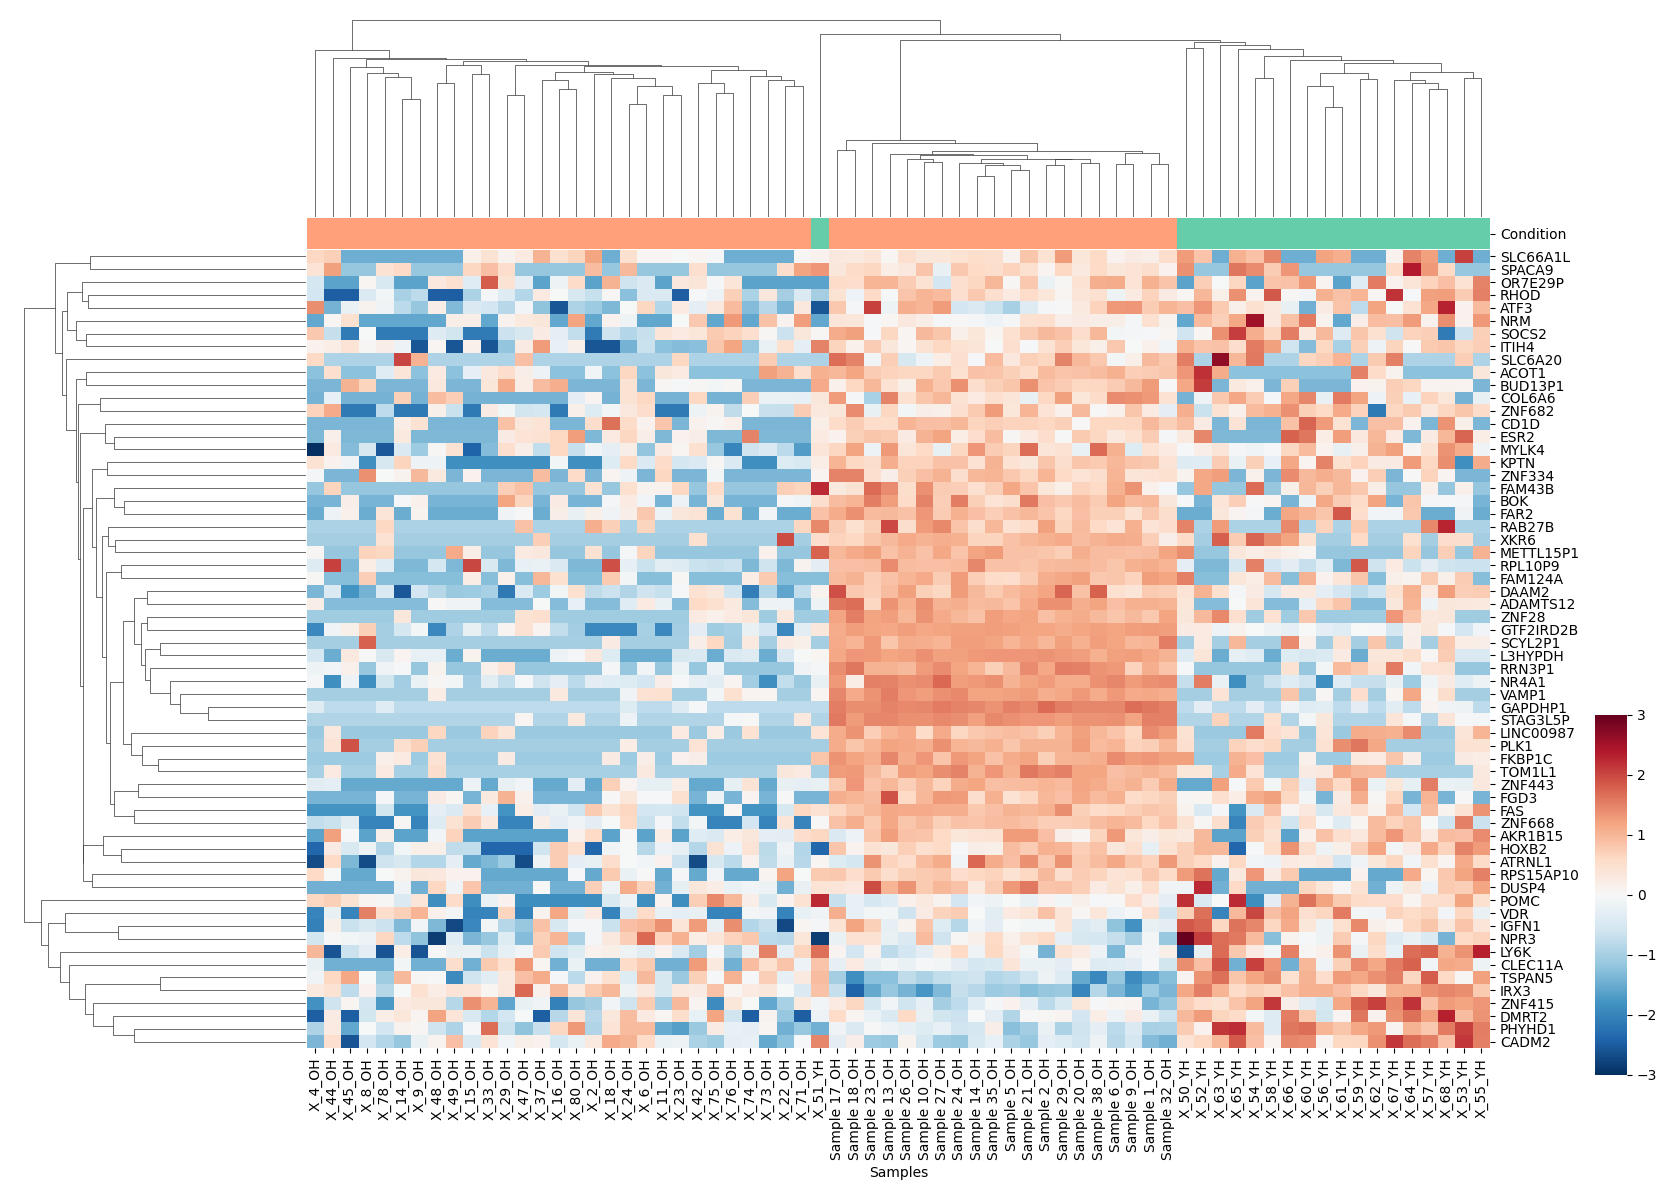

In [16]:
dds_sigs_expr = pd.DataFrame(dds_sigs.layers['log1p'].T, 
                       index=dds_sigs.var_names, 
                       columns=dds_sigs.obs.Samples)
# 어노테이션 설정
ann_col = dds_sigs.obs['Condition']
ann_col.index = dds_sigs.obs['Samples']

# 애노테이션 색상 설정
ann_colors = {'Group': {'YH': '#66CDAA', 'OH': '#FFA07A'}}

# Heatmap
sns.clustermap(dds_sigs_expr, 
               z_score=0,
               # standard_scale=0,
               cmap = 'RdBu_r',#'RdYlBu_r', 
               center=0,
               xticklabels=True,
               yticklabels=True,
               cbar_pos=(1, 0.1, 0.02, 0.3),
               figsize=(16, 12), # (10, 2),
               col_colors=ann_col.map(ann_colors['Group']),
               vmin=-3,
               vmax=3)
               # col_cluster=None)
               # row_cluster=None)
plt.title(f'')
plt.show()